In [7]:
import pandas as pd
import numpy as np

# Pour que les résultats soient reproductibles
np.random.seed(42)

# Nombre d'échantillons (lignes)
n_samples = 150

# Génération de données réalistes pour chaque variable
energie = np.random.normal(loc=500, scale=80, size=n_samples)           # Consommation énergétique (en MWh)
production = np.random.normal(loc=1000, scale=150, size=n_samples)      # Volume de production (en unités)
transport = np.random.normal(loc=200, scale=40, size=n_samples)         # Distance de transport (en tonnes.km)
dechets = np.random.normal(loc=30, scale=5, size=n_samples)             # Déchets produits (en tonnes)

# Calcul des émissions de CO2 (cible), avec une relation linéaire + un petit bruit
emissions_CO2 = (
    energie * 0.3 +
    production * 0.05 +
    transport * 0.4 +
    dechets * 1.2 +
    np.random.normal(loc=0, scale=20, size=n_samples)  # bruit aléatoire
)

# Création du DataFrame
df = pd.DataFrame({
    'energie': energie,
    'production': production,
    'transport': transport,
    'dechets': dechets,
    'emissions_CO2': emissions_CO2
})

# Sauvegarde dans un fichier CSV
df.to_csv("donnees_predicteur_carbone_plus_precises.csv", index=False)

print("✅ Fichier CSV généré avec succès : donnees_predicteur_carbone_plus_precises.csv")


✅ Fichier CSV généré avec succès : donnees_predicteur_carbone_plus_precises.csv


In [10]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Chargement des données depuis le fichier CSV
df = pd.read_csv("donnees_predicteur_carbone_plus_precises.csv")

# 2. Séparation des variables
# X contient les variables d'entrée (ce qu'on utilise pour prédire)
# y contient la variable cible (ce qu'on veut prédire)
X = df.drop(columns=["emissions_CO2"])
y = df["emissions_CO2"]

# 3. Division des données en un ensemble d'entraînement et un ensemble de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalisation des données (important pour que les modèles ne soient pas biaisés par l’échelle) La normalisation permet au modèle d’apprendre 
# de manière équilibrée à partir de toutes les variables, quelle que soit leur échelle.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # on apprend à normaliser sur le train
X_test_scaled = scaler.transform(X_test)        # puis on applique la même normalisation sur le test

# 5. Création et entraînement du modèle (ici Random Forest, un modèle puissant pour ce type de données)
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Prédiction sur les données de test
y_pred = model.predict(X_test_scaled)

# 7. Évaluation des performances du modèle
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Affichage des résultats
print(f"Erreur absolue moyenne (MAE) : {mae:.2f} tonnes de CO2")
print(f"Erreur quadratique moyenne (RMSE) : {rmse:.2f} tonnes de CO2")




Erreur absolue moyenne (MAE) : 20.07 tonnes de CO2
Erreur quadratique moyenne (RMSE) : 24.66 tonnes de CO2


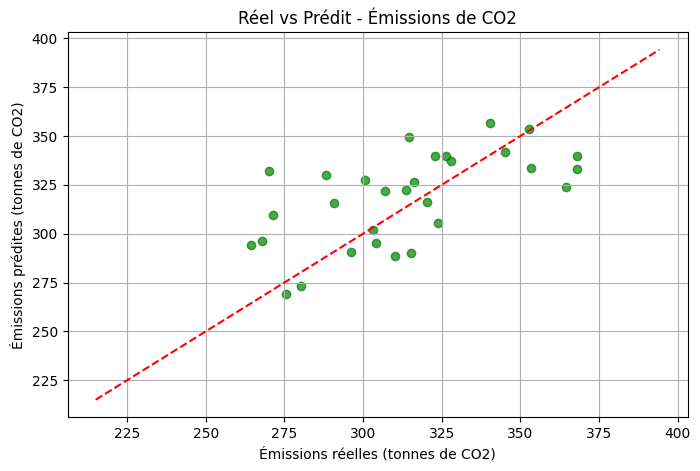

In [11]:
# 8. Visualisation : Comparaison entre les vraies valeurs et les prédictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ligne parfaite
plt.xlabel("Émissions réelles (tonnes de CO2)")
plt.ylabel("Émissions prédites (tonnes de CO2)")
plt.title("Réel vs Prédit - Émissions de CO2")
plt.grid(True)
plt.show()